In [1]:
import numpy as np
import pandas as pd

def standardize(df):
    return (df - df.mean()) / df.std()

def reverse(val, mean, std):
    return (val*std) + mean

df = pd.read_csv("AAPL_data.csv")
df = df.drop('index', axis=1)
df = df.drop('time', axis=1)

mean = df['close'].mean()
std = df['close'].std()

df = standardize(df)

df = df.drop('high', axis=1)

df = df.drop('low', axis=1)

X_train = df.drop('close', axis=1)
y_train = df['close']

total_examples = len(X_train)
train_ratio = 0.8
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

train_examples = int(total_examples * train_ratio)

# Split into train and test sets
X_test = X_train[train_examples:]
X_train = X_train[:train_examples]


y_train = y_train[:train_examples]
y_test = y_train[train_examples:]

In [2]:
print(X_train)

[[-1.51116317  1.03960154]
 [-1.50225453  0.06779016]
 [-1.49207323 -0.67969405]
 ...
 [ 0.30327174  2.27792704]
 [ 0.24867452  2.17408893]
 [ 0.29054511  0.40988906]]


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression(X, y):
    regr = LinearRegression()
    regr.fit(X, y)
    
    y_pred = regr.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print("MSE:", mse)
    print("R2:", r2)
    
    coef_df = pd.DataFrame(regr.coef_, ["open", "volume"], columns=['Coefficients'])
    
    return coef_df



In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_test(X, y, test_X, test_y):
    regr = LinearRegression()

    regr.fit(X, y)

    test_predictions = regr.predict(test_X)

    mse_test = mean_squared_error(test_y, test_predictions)
    r2_test = r2_score(test_y, test_predictions)
    
    print("MSE (Test):", mse_test)
    print("R2 (Test):", r2_test)

    coef_df = pd.DataFrame(regr.coef_, ["open", "volume"], columns=['Coefficients'])

    return coef_df




In [6]:
print("Training data")

results = linear_regression(X_train, y_train)
print(results)
print("\n\nTesting data")

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training data
MSE: 0.006099805803696774
R2: 0.994484909778117
        Coefficients
open        0.996406
volume      0.002154


Testing data
Training samples: 518
Testing samples: 130


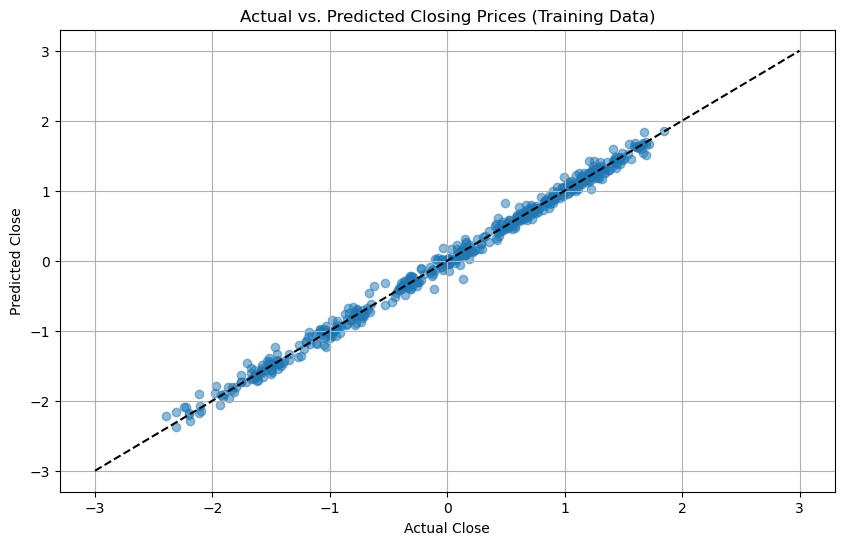

In [7]:
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([-3, 3], [-3, 3], '--k')  
plt.title('Actual vs. Predicted Closing Prices (Training Data)')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.grid(True)
plt.show()
